In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pickle

"""
Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5

Temperature -- K
L -- L/Lo
R -- R/Ro
AM -- Mv
Color -- General Color of Spectrum
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants
"""

# Read the CSV file
stars = pd.read_csv("data/Stars.csv")
stars_original = pd.read_csv("data/Stars.csv")

# Remove any Empty Rows
stars = stars.dropna()

stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [9]:
# File paths
input_csv_path = 'data/ExtraStars.csv'
output_csv_path = 'data/formattedExtraStars.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_csv_path)

# Extract the last three columns and reorder their data
last_three = df[['Star color', 'Spectral Class', 'Star type']]

# Drop the last three columns from the original DataFrame
df = df.drop(columns=['Star type', 'Star color', 'Spectral Class'])

# Concatenate the reordered columns to the DataFrame
df = pd.concat([df, last_three], axis=1)

# Rename the columns
df.columns = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']

# Write the modified DataFrame to the new CSV file
df.to_csv(output_csv_path, index=False)

In [5]:
d = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
stars['Type'] = stars['Type'].map(d)

# Merge similar color names
stars['Color'] = stars['Color'].str.lower()  # Convert to lowercase to ensure consistency
stars['Color'] = stars['Color'].replace({
    'blue white': 'blue-white',
    'yellow-white': 'white-yellow',
    'yellowish white': 'yellowish'
})

# Encode the colors
color = {
    'red': 0, 
    'blue-white': 1, 
    'white': 2, 
    'blue': 3, 
    'yellowish': 4, 
    'pale yellow orange': 5, 
    'whitish': 6, 
    'white-yellow': 7, 
    'orange': 8, 
    'orange-red': 9
}
stars['Color'] = stars['Color'].map(color)

# Define the encoding dictionary for Spectral_Class
spectral_class = {
    'O': 0,
    'B': 1,
    'A': 2,
    'F': 3,
    'G': 4,
    'K': 5,
    'M': 6
}

# Encode the Spectral_Class column
stars['Spectral_Class'] = stars['Spectral_Class'].map(spectral_class)

stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,0,6,0
1,3042,0.000500,0.1542,16.60,0,6,0
2,2600,0.000300,0.1020,18.70,0,6,0
3,2800,0.000200,0.1600,16.65,0,6,0
4,1939,0.000138,0.1030,20.06,0,6,0


In [6]:
features = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']

X = stars[features]
y = stars['Type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # 50% training and 50% test

print(X)
print(y)

     Temperature              L          R    A_M  Color  Spectral_Class
0           3068       0.002400     0.1700  16.12      0               6
1           3042       0.000500     0.1542  16.60      0               6
2           2600       0.000300     0.1020  18.70      0               6
3           2800       0.000200     0.1600  16.65      0               6
4           1939       0.000138     0.1030  20.06      0               6
..           ...            ...        ...    ...    ...             ...
235        38940  374830.000000  1356.0000  -9.93      3               0
236        30839  834042.000000  1194.0000 -10.63      3               0
237         8829  537493.000000  1423.0000 -10.73      2               2
238         9235  404940.000000  1112.0000 -11.23      2               2
239        37882  294903.000000  1783.0000  -7.80      3               0

[240 rows x 6 columns]
0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
N

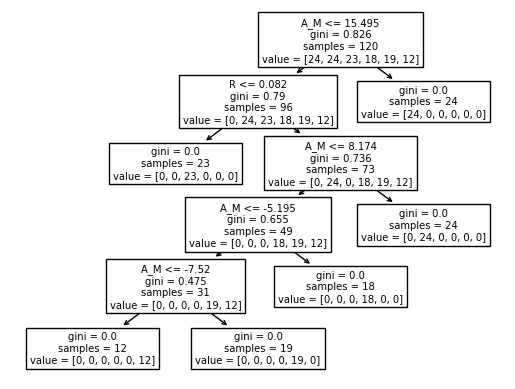

In [7]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

tree.plot_tree(dtree, feature_names=features)

# Save the figure to a file
plt.savefig('stars_plot.png', dpi=300, format='png')


	39.5	17.4	186.0	3800.0	0 -> Adelie Penguin
	'Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class'
	3600,0.0029,0.51,10.69,0,6


In [8]:
print(dtree.predict([[3600,0.0029,0.51,10.69,0,6]]))

[1]


C:\Users\kaspe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [10]:
pickle.dump(dtree , open('penguin_model' , 'wb'))